# TP : Implémentation d'un réseau de neurones de type Perceptron multicouche pour un problème de classification
Dans ce TP, vous allez implémenter en Numpy un réseau de neurones de type Perceptron multicouche.


## Configuration
### Si vous utilisez un ordinateur de l'Enseirb:
#### 1) Lancer une session linux (et non pas windows)
#### 2) Aller dans "Applications", puis "Autre", puis "conda_pytorch" (un terminal devrait s'ouvrir)
#### 3) Dans ce terminal, taper la commande suivante pour lancer Spyder :  
`spyder &`  
### Si vous utilisez votre ordinateur personnel, il faudra installer Spyder.  

---
---
## Dans tous les cas, ne pas oublier de configurer Spyder en suivant ces [instructions](https://gbourmaud.github.io/files/configuration_spyder_annotated.pdf).
---
---

# PARTIE 1 : Exemple "jouet"

### Télécharger le fichier [utils.py](https://gbourmaud.github.io/files/intro_deep_learning/TP/TP_MLP/utils.py) contenant des fonctions qui seront utilisées par la suite.

### Créer un nouveau script python et copiez/collez le code suivant :

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import utils

np.random.seed(0)

### Définition d'un exemple jouet à 3 classes en 2D :

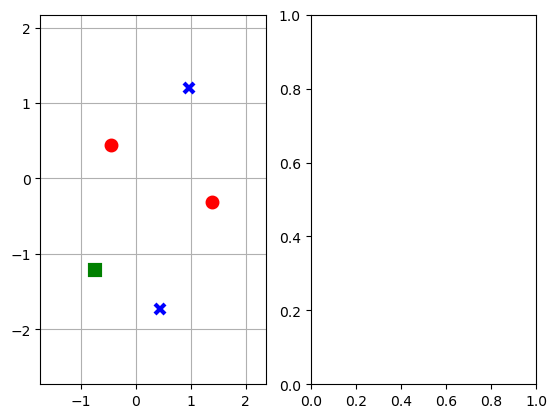

In [2]:
#%% DEFINE AND PLOT DATA
    
style_per_class = ['xb', 'or', 'sg']
X = np.array([[1.2, 2.3, -0.7, 3.2, -1.3],[-3.4, 2.8, 1.2, -0.4, -2.3]]).T
X -= X.mean() #centering data (globally)
X /= X.std() #reduce data (globally)
y = np.array([0,0,1,1,2])

C = len(style_per_class)
N = X.shape[0]
xx, yy = utils.make_meshgrid(X[:,0], X[:,1], h=0.05)


fig1, axs1 = plt.subplots(ncols=2)
axs1[0].set_xlim(xx.min(), xx.max())
axs1[0].set_ylim(yy.min(), yy.max())
axs1[0].grid(True)

for i in range(C):
    x_c = X[y==i,:]
    axs1[0].plot(x_c[:,0],x_c[:,1],style_per_class[i],markersize=7, markeredgewidth=3.)

plt.pause(0.1)

## Implémentation des fonctions $\text{FC}$, $\widetilde{\text{FC}}$, $\text{ReLU}$ et $\widetilde{\text{ReLU}}$

In [20]:
def FC_forward(X,W,b):
    Z = X.dot(W) + b #NxH
    return Z

def FC_backward(dc_dZ, X, W, b):
    dc_dX = 0 #TODO compute dc_dX (one line)
    dc_dW = 0 #TODO compute dc_dW (one line)
    dc_db = 0 #TODO compute dc_db (one line)
    return dc_dX, dc_dW, dc_db

def relu_forward(X):
    Z = np.maximum(0.,X) 
    return Z

def relu_backward(dc_dZ, X):
    dc_dX = 0 #TODO compute dc_dX (two lines)
    return dc_dX
    

**Travail : implémenter les fonctions `FC_backward` et  `relu_backward` en utilisant les équations obtenues en TP. Le code ci-après permet de tester vos implémentations.**

In [ ]:
def test_FC_backward():
    
    eta = 1e-5
    N = 100
    D = 10
    H = 20
    X = np.random.normal(size=(N,D))
    dX = np.random.normal(size=(N,D))
    W = np.random.normal(size=(D,H))
    b = np.random.normal(size=(H))
    dW = np.random.normal(size=(D,H))
    db = np.random.normal(size=(H))


    ddX_approx = (FC_forward(X+eta*dX,W,b).sum() - FC_forward(X,W,b).sum())/eta
    dc_dX, _, _ = FC_backward(np.ones((N,H)), X, W, b)
    ddX = (dc_dX*dX).sum()
    if(np.isclose(ddX,ddX_approx)):
        print('Test FC_backward dl_dX: SUCCESS')
    else:
        print('Test FC_backward dl_dX: FAILURE')
        sys.exit()
    
    ddW_approx = (FC_forward(X,W+eta*dW,b).sum() - FC_forward(X,W,b).sum())/eta
    _, dc_dW, _ = FC_backward(np.ones((N,H)), X, W, b)
    ddW = (dc_dW*dW).sum()
    if(np.isclose(ddW,ddW_approx)):
        print('Test FC_backward dl_dW: SUCCESS')
    else:
        print('Test FC_backward dl_dW: FAILURE')
        sys.exit()
    
    ddb_approx = (FC_forward(X,W,b+eta*db).sum() - FC_forward(X,W,b).sum())/eta
    _, _, dc_db = FC_backward(np.ones((N,H)), X, W, b)
    ddb = (dc_db*db).sum()
    if(np.isclose(ddb,ddb_approx)):
        print('Test FC_backward dl_db: SUCCESS')
    else:
        print('Test FC_backward dl_db: FAILURE')
        sys.exit()
    
    return

test_FC_backward()

In [ ]:
def test_relu_backward():
    
    eta = 1e-5
    N = 100
    D = 10
    X = np.random.normal(size=(N,D))
    dX = np.random.normal(size=(N,D))

    ddX_approx = (relu_forward(X+eta*dX).sum() - relu_forward(X).sum())/eta
    dc_dX = relu_backward(np.ones((N,D)), X)
    ddX = (dc_dX*dX).sum()
    if(np.isclose(ddX,ddX_approx)):
        print('Test relu_backward dl_db: SUCCESS')
    else:
        print('Test relu_backward dl_db: FAILURE')
        sys.exit()
    
    return

test_relu_backward()

### Implémentation d'un MLP à une couche cachée :

In [12]:
class MLP:
    def __init__(self, H):

        self.C = 3
        self.D = 2
        self.H = H
        

        #parameters
        self.W1 = (np.sqrt(6./self.D))*(2*(np.random.uniform(size=(self.D,self.H))-0.5))
        self.b1 = (1./np.sqrt(self.D))*(2*(np.random.uniform(size=(self.H))-0.5))
        self.W3 = (np.sqrt(6./self.H))*(2*(np.random.uniform(size=(self.H,self.C))-0.5))
        self.b3 = (1./np.sqrt(self.H))*(2*(np.random.uniform(size=(self.C))-0.5))
        
        #gradients
        self.dc_dW1 = np.zeros_like(self.W1)
        self.dc_db1 = np.zeros_like(self.b1)
        self.dc_dW3 = np.zeros_like(self.W3)
        self.dc_db3 = np.zeros_like(self.b3)
        

        
    def forward(self,X):
    
        X1 = FC_forward(X, self.W1, self.b1) #NxH
        X2 = relu_forward(X1) #NxH
        S = FC_forward(X2, self.W3, self.b3) #NxC
    
        return X,X1,X2,S
    
    def backward(self,dc_dS, S, X2, X1, X0):
        
        dc_dX2, dc_dW3, dc_db3 = FC_backward(dc_dS, X2, self.W3, self.b3)
        self.dc_dW3 += dc_dW3
        self.dc_db3 += dc_db3
        
        dc_dX1 = relu_backward(dc_dX2, X1)
        
        dc_dX0, dc_dW1, dc_db1 = FC_backward(dc_dX1, X0, self.W1, self.b1)
        self.dc_dW1 += dc_dW1
        self.dc_db1 += dc_db1
        
        
        return
        

### Définition de la fonction de coût :

In [13]:
def logsoftmax(x):
    x_shift = x - np.amax(x, axis=1, keepdims=True)
    return x_shift - np.log(np.exp(x_shift).sum(axis=1, keepdims=True))   
    
def softmax(x):
    e_x = np.exp(x - np.amax(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)
    
def crossEntropyLoss(S, y):
    N = y.shape[0]
    P = softmax(S.astype('double'))
    log_p = logsoftmax(S.astype('double'))
    a = log_p[np.arange(N),y]
    l = -a.sum()/N
    dc_dS = P
    dc_dS[np.arange(N),y] -= 1
    dc_dS = dc_dS/N
    return (l, dc_dS)

### Implémentation de la méthode de descente de gradient avec moment :

In [14]:
class GradientDescentWithMomentum:
    def __init__(self, model, beta, lr):
        
        self.model = model
        self.beta= beta
        self.lr = lr
        
        #momentum
        self.VW1 = np.zeros_like(self.model.W1)
        self.Vb1 = np.zeros_like(self.model.b1)
        self.VW3 = np.zeros_like(self.model.W3)
        self.Vb3 = np.zeros_like(self.model.b3)
        
        self.is_init = True
    def step(self):
        if(self.is_init == True):
            self.VW1 = self.model.dc_dW1      
            self.VW3 = self.model.dc_dW3         
            self.Vb1 = self.model.dc_db1           
            self.Vb3 = self.model.dc_db3
            self.is_init = False
        else:            
            self.VW1 = self.beta*self.VW1 + self.model.dc_dW1
            self.VW3 = self.beta*self.VW3 + self.model.dc_dW3
            self.Vb1 = self.beta*self.Vb1 + self.model.dc_db1
            self.Vb3 = self.beta*self.Vb3 + self.model.dc_db3
        
        self.model.W1 -= self.lr*self.VW1
        self.model.W3 -= self.lr*self.VW3
        self.model.b1 -= self.lr*self.Vb1
        self.model.b3 -= self.lr*self.Vb3
    
    def zero_grad(self):
        self.model.dc_dW1.fill(0.)
        self.model.dc_db1.fill(0.)
        self.model.dc_dW3.fill(0.)
        self.model.dc_db3.fill(0.)

### Avant de lancer un apprentissage, il faut choisir les hyper-paramètres de l'architecture et de l'algorithme de descente de gradient avec moment

In [15]:
#%% HYPERPARAMETERS
H = 300
lr = 1e-2 #learning rate
beta = 0.9 #momentum parameter

### Création d'une instance du MLP à une couche cachée :

In [16]:
model = MLP(H)

### Création d'une instance de la descente de gradient avec moment

In [17]:
optimizer = GradientDescentWithMomentum(model, beta, lr)

### Nous pouvons lancer l'optimisation :

In [ ]:
c_seq = []
it_seq = []
line_loss, = axs1[1].plot(it_seq,c_seq)
axs1[1].legend()
axs1[1].set_xlabel('Iterations')

it = 0
while 1:    
    #Forward Pass
    X0,X1,X2,S = model.forward(X)
    
    #Compute Loss
    [c, dc_dS] = crossEntropyLoss(S, y)
    
    #Print Loss and Classif Accuracy
    pred = np.argmax(S, axis=1)
    acc = (np.argmax(S, axis=1) == y).astype('float').sum()/N
    print('Iter {} | Training Loss = {} | Training Accuracy = {}%'.format(it,c,acc*100))

    #Backward Pass (Compute Gradient)
    optimizer.zero_grad()
    model.backward(dc_dS, S, X2, X1, X0)
    
    #Update Parameters
    optimizer.step()
    it += 1
    
    c_seq.append(c)
    it_seq.append(it)
    if(np.mod(it,10)==0):
        #Plot decision boundary
        axs1[0].cla()
        for i in range(C):
            x_c = X[y==i,:]
            axs1[0].plot(x_c[:,0],x_c[:,1],style_per_class[i],markersize=7, markeredgewidth=3.)
        utils.plot_contours(axs1[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        
        line_loss.remove()
        line_loss, = axs1[1].plot(it_seq,c_seq,'r',label='Training loss')
        axs1[1].legend()
        fig1.canvas.draw()
        fig1.canvas.flush_events()
        plt.pause(0.1)

## Travail à effectuer  
Après avoir implémenté la fonction `backward`, vous devriez constater que l'apprentissage sur l'exemple jouet "fonctionne", c'est-à-dire que le coût diminue progressivement vers zéro et le taux de bonne classification atteint rapidement 100%.  
  
Si vous avez le temps :
* Vous remarquerez que les paramètres du MLP sont initialisés aléatoirement selon une distribution uniforme centrée en zéro appelée "Initialisation de Kaiming". Remplacer cette initialisation en initialisant tous les paramètres à zéro. Afficher les valeurs des activations (`X1`, `X2`, `S`) et des dérivées (notamment `dc_dW3` et `dc_dW1`). Que constatez-vous ? Pourquoi ?
* Restaurer l'initialisation aléatoire des paramètres.
* Modifier l'implémentation pour obtenir un MLP à 2 couches cachées (rajouter une transformation affine et une ReLU au MLP actuel).
* Modifier l'implémentation pour la rendre générique de telle sorte que le nombre de couches cachées soit un hyper-paramètre réglable.

# PARTIE 2 : Reconnaissance de chiffres manuscrits

Maintenant que vous disposez d'une implémentation fonctionnelle de l'optimisation des paramètres d'un MLP sur un exemple "jouet", vous allez pouvoir l'adapter à un cas réel (de petite taille pour pouvoir effectuer des apprentissages en quelques dizaines de secondes sur CPU).  

La base de données étiquetées MNIST contient 70000 images de chiffres manuscrits. Chaque image est de taille 28x28, et est accompagnée d'une étiquette indiquant le chiffre qu'elle représente (0,1,2,..,9). Ainsi la base de données MNIST est très pratique pour entraîner un réseau de neurones à reconnaître des chiffres manuscrits.

### Mise en place de la base MNIST

+ Télécharger la base MNIST [ici](https://gbourmaud.github.io/files/intro_deep_learning/TP/TP_MLP/IA200/MNIST_bmp.zip)
+ Décompresser le ficher dans `/tmp` **(attention bien décompresser dans `/tmp` et pas dans `/net/.../tmp`)**
+ Les fichiers décompressés sont au format .bmp, ainsi vous pouvez les ouvrir pour regarder à quoi ressemble les données de cette base. **Un problème d'apprentissage supervisé repose sur une base de données étiquetées, ainsi il est très important de prendre le temps de visualiser les données et leurs étiquettes pour savoir ce qu'on s'apprête à traiter !**
+ Le code suivant permet de charger la base d'entraînement de MNIST (60000 images) ainsi que la base de test de MNIST (10000 images) (la partie `__main__` permet d'afficher quelques images et leurs étiquettes) :

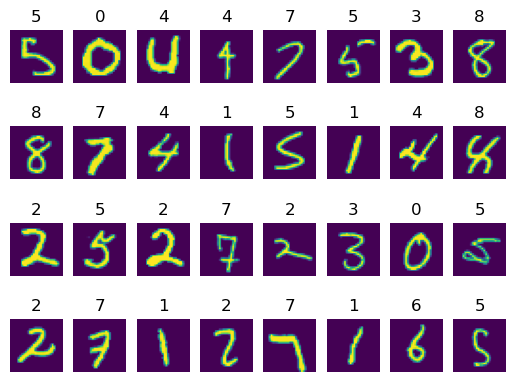

In [3]:
import PIL.Image as Image
from os import path
from os import listdir
import numpy as np
import math
import matplotlib.pyplot as plt

def load_MNIST(path_MNIST_bmp, mean_norm=0., std_norm=1.):
    
    filenames = listdir(path_MNIST_bmp)
    
    imgs_train = np.zeros((60000,28,28))
    labels_train = np.zeros(60000,dtype=np.uint8)
    n_train = 0
    
    imgs_test = np.zeros((10000,28,28))
    labels_test = np.zeros(10000,dtype=np.uint8)
    n_test = 0
    
    W=H=28
    for i, filename in enumerate(filenames):
        
        f_name, f_ext = path.splitext(filename)
        set_type, class_type ,num_im = f_name.split('_')
        
        num_im = int(num_im)
        img = np.array(Image.open(path.join(path_MNIST_bmp,filename)))/255.
        
        N_W = math.ceil(math.sqrt(num_im))
        N_H = math.ceil(num_im/N_W)
        
        im_array_ext = img.reshape(N_H,H,W*N_W).transpose((1,0,2))
        im_array_ext = im_array_ext.reshape(H,N_W*N_H,W).transpose((1,0,2))

        im_array = im_array_ext[:num_im,:,:]        
        
        if(set_type=='train'):
            imgs_train[n_train:n_train+num_im,:,:] = (im_array-mean_norm)/std_norm
            labels_train[n_train:n_train+num_im] = int(class_type)
            n_train += num_im
        elif(set_type=='test'):
            imgs_test[n_test:n_test+num_im,:,:] = (im_array-mean_norm)/std_norm
            labels_test[n_test:n_test+num_im] = int(class_type)
            n_test += num_im
                
    assert n_test == 10000
    assert n_train == 60000
        
        
    
    return imgs_train, labels_train, imgs_test, labels_test
    
if(__name__ == "__main__"):
    path_MNIST_bmp = './MNIST_bmp'

    imgs_train, labels_train, imgs_test, labels_test = load_MNIST(path_MNIST_bmp, mean_norm=0., std_norm=1.)
    n_train = imgs_train.shape[0]
    n_test = imgs_test.shape[0]
    
    ids = np.random.permutation(n_train)
    
    plt.figure()
    for i in range(8):
        for j in range(4):
            plt.subplot(4,8,i+1 + j*8)
            plt.imshow(imgs_train[ids[i+j*8],:,:])
            plt.title(labels_train[ids[i+j*8]])
            plt.axis('off')

    vec_train = imgs_train.reshape((n_train,-1))

### Normalisation des données

En pratique, les données doivent être normalisées pour faciliter l'apprentissage. La normalisation s'effectue généralement en calculant la moyenne empirique et l'écart-type empirique de la base de données.


In [5]:
 #%% Compute mean and std
mean = np.mean(imgs_train)
std = np.std(imgs_train)
print('Mean MNIST {}, Std MNIST {}'.format(mean, std))

Mean MNIST 0.13066047627384297, Std MNIST 0.30810780385646214


Vous pouvez utiliser ces valeurs lorsque vous chargez les données : `load_MNIST(path_MNIST_bmp, mean_norm=0.1306, std_norm=0.3080)`.

# Travail à effectuer

+ Adapter le code de la Partie 1 pour entraîner un MLP à reconnaître des chiffres manuscrits avec une descente de gradient **stochastique** (la fonction `np.random.permutation` permet notamment de mélanger des indices, ce qui est pratique pour mélanger les données avant chaque epoch), avec **arrêt prématuré** (sauvegarder les paramètres sur le disque dur au cours de l'entraînement). **Remarque : Tout ce qui concerne la génération des données de l'exemple jouet de la Partie 1, ainsi que les fonctions d'affichage des frontières de décisions ne doivent pas être conservées.**
+ Faire un second script chargeant les paramètres appris et testant le modèle sur la base de test. Si votre code fonctionne correctement, vous devriez obtenir un taux de bonne classification supérieur à 90% sur la base de test.
+ Modifier les hyperparamètres (pas d'apprentissage, taille du minibatch, nombre de couches du MLP, taille de chaque couche,...) pour essayer d'améliorer le taux de bonne classification.

Si vous êtes bloqués, voici un exemple de correction : [main_MLP_two_layers_MNIST.py](https://gbourmaud.github.io/files/intro_deep_learning/TP/TP_MLP/IA200/main_MLP_two_layers_MNIST.py) avec le fichier [utils.py](https://gbourmaud.github.io/files/intro_deep_learning/TP/TP_MLP/IA200/utils.py).